In [2]:
# create a dataframe of the annotated dataset in the folder ..data/CodeQualData/py800_annotated
import os
import pandas as pd
import json

def create_df_from_annotated_directory(directory):
    data = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".jsonl"):
                with open(os.path.join(root, file), 'r') as f:
                    for line in f:
                        data.append(json.loads(line))

    #order by descending order of size
    annotated_df = pd.DataFrame(data)
    return annotated_df

#order by descending order of size
v0_df = create_df_from_annotated_directory('../data/rawv0')
v1_df = create_df_from_annotated_directory('../data/rawv1')
v2_df = create_df_from_annotated_directory('../data/rawv2')
v3_df = create_df_from_annotated_directory('../data/rawv3')
v4_df = create_df_from_annotated_directory('../data/rawv4')

# merge the two dataframes
py800_annotated_df = pd.concat([v0_df, v1_df, v2_df, v3_df, v4_df])
py800_annotated_df

,problem_id,submission_id,problem_description,quality_assessment,quality_score,problem
0,p03494,s642429606,This Python snippet takes two inputs: an integ...,{'functionality': 'The code works perfectly fi...,"{'functionality': '4', 'readability': '3', 'py...",NaN
1,p03494,s194658803,The provided Python code accepts an integer in...,{'functionality': 'Code is functional but firs...,"{'functionality': '3', 'readability': '4', 'py...",NaN
2,p03494,s575045794,This Python snippet takes N integers as an inp...,{'functionality': 'The code works as expected ...,"{'functionality': '4', 'readability': '3', 'py...",NaN
3,p03494,s476321647,The code takes two inputs - an integer 'a' and...,"{'functionality': 'The code works as expected,...","{'functionality': '3', 'readability': '3', 'py...",NaN
4,p03494,s965275653,This is a python program that reads an input N...,{'functionality': 'The code would work given t...,"{'functionality': '4', 'readability': '3', 'py...",NaN
...,...,...,...,...,...,...
365,p03962,s533634324,AtCoDeer the deer recently bought three paint ...,NaN,"{'functionality': '5', 'readability': '4', 'py...",NaN
366,p03962,s497805599,AtCoDeer the deer recently bought three paint ...,NaN,"{'functionality': '5', 'readability': '5', 'py...",NaN
367,p02844,s123901226,AtCoder Inc. has decided to lock the door of i...,NaN,"{'functionality': '5', 'readability': '5', 'py...",NaN
368,p03192,s139779800,You are given an integer N that has exactly fo...,NaN,"{'functionality': '5', 'readability': '5', 'py...",NaN


In [3]:
# get all distinct problems from py800_annotated_df
problems = py800_annotated_df['problem_id'].unique()
problems.tofile('../data/CodeQualData/problems.txt', sep='\n', format='%s')
# get all submissions from py800_annotated_df
submissions = py800_annotated_df['submission_id'].unique()
print(len(submissions))
submissions.tofile('../data/CodeQualData/submissions.txt', sep='\n', format='%s')

2300


In [4]:
# drop duplicates with the same submission_id and problem_id
py800_annotated_df = py800_annotated_df.drop_duplicates(subset=['submission_id', 'problem_id'])
print(py800_annotated_df.shape)

(2300, 6)


In [5]:
# get all the submissions in the python_800 dataset
import os
import pandas as pd
py_800_dir = '../data/CodeNet/python_800'

def read_file(file):
    with open(file, 'r') as f:
        return f.read()

data = []
for root, dirs, files in os.walk(py_800_dir):
    for file in files:
        if file.endswith(".py"):
            data.append({'problem_id': root.split('/')[-1], 'submission_id': file.strip('.py'), 'submission': read_file(os.path.join(root, file))})
py800_df = pd.DataFrame(data)
py800_df

,problem_id,submission_id,submission
0,p03494,s642429606,"n=int(input())\na=list(map(int,input().split()..."
1,p03494,s194658803,s = int(input())\ns = input().rstrip().split('...
2,p03494,s575045794,def lo2(n):\n count = 0\n while n%2==0:\...
3,p03494,s476321647,"a = int(input())\nb = list(map(int, input().sp..."
4,p03494,s965275653,"N = int(input())\nA = list(map(int,input().spl..."
...,...,...,...
239995,p02991,s289199974,import sys\ninput = sys.stdin.buffer.readline\...
239996,p02991,s007313054,"from collections import deque\n\nn, m = map(i..."
239997,p02991,s209638769,from collections import defaultdict as dd\nfro...
239998,p02991,s447876624,import sys\nfrom collections import deque\n\n\...


In [6]:
# merge the two dataframes by problem_id and submission_id
py800_annotated_df = pd.merge(py800_annotated_df, py800_df, on=['problem_id', 'submission_id'])
py800_annotated_df

,problem_id,submission_id,problem_description,quality_assessment,quality_score,problem,submission
0,p03494,s642429606,This Python snippet takes two inputs: an integ...,{'functionality': 'The code works perfectly fi...,"{'functionality': '4', 'readability': '3', 'py...",NaN,"n=int(input())\na=list(map(int,input().split()..."
1,p03494,s194658803,The provided Python code accepts an integer in...,{'functionality': 'Code is functional but firs...,"{'functionality': '3', 'readability': '4', 'py...",NaN,s = int(input())\ns = input().rstrip().split('...
2,p03494,s575045794,This Python snippet takes N integers as an inp...,{'functionality': 'The code works as expected ...,"{'functionality': '4', 'readability': '3', 'py...",NaN,def lo2(n):\n count = 0\n while n%2==0:\...
3,p03494,s476321647,The code takes two inputs - an integer 'a' and...,"{'functionality': 'The code works as expected,...","{'functionality': '3', 'readability': '3', 'py...",NaN,"a = int(input())\nb = list(map(int, input().sp..."
4,p03494,s965275653,This is a python program that reads an input N...,{'functionality': 'The code would work given t...,"{'functionality': '4', 'readability': '3', 'py...",NaN,"N = int(input())\nA = list(map(int,input().spl..."
...,...,...,...,...,...,...,...
2295,p03962,s533634324,AtCoDeer the deer recently bought three paint ...,NaN,"{'functionality': '5', 'readability': '4', 'py...",NaN,# A - AtCoDeerくんとペンキ\ndef main():\n abc = l...
2296,p03962,s497805599,AtCoDeer the deer recently bought three paint ...,NaN,"{'functionality': '5', 'readability': '5', 'py...",NaN,"ary = list(map(int, input().split()))\nprint(l..."
2297,p02844,s123901226,AtCoder Inc. has decided to lock the door of i...,NaN,"{'functionality': '5', 'readability': '5', 'py...",NaN,from itertools import product\n\nn = int(input...
2298,p03192,s139779800,You are given an integer N that has exactly fo...,NaN,"{'functionality': '5', 'readability': '5', 'py...",NaN,input_num = str(input())\ncnt_2_in_str = lambd...


In [7]:
# create a dataframe from jsonl file
prob_desc_df = pd.read_json('../data/CodeQualData/py800_metadata_problem_desc.jsonl', lines=True)
def get_problem_desc(problem_id):
    row = prob_desc_df[prob_desc_df['problem_id'] == problem_id]
    return row.values[0][1]

In [9]:
# for each row in py800_annotated_df extract the problem_id, submission_id, and the quality score

data = []
for index, row in py800_annotated_df.iterrows():
    temp_dict = {'problem_id': row['problem_id'], 'problem': get_problem_desc(row['problem_id']), 'submission_id': row['submission_id'], 'submission': row['submission']}
    temp_dict.update(row['quality_score'])
    data.append(temp_dict)

# create a dataframe from the data
py800_annotated_df_score = pd.DataFrame(data)
py800_annotated_df_score.sample(20)


,problem_id,problem,submission_id,submission,functionality,readability,pythonic,error_handling,efficiency
995,p03033,There is an infinitely long street that runs w...,s658848629,"N,Q=map(int,input().split())\nimport sys\ndef ...",5,5,5,5,5
764,p02388,Write a program which calculates the cube of a...,s666641680,x = int(input())\n\nif 1 <= x <= 100:\n pri...,5,5,5,1,5
1981,p02555,Given is an integer S.\nFind how many sequence...,s424262884,# D - Redistribution\nS = int(input())\nMOD = ...,5,4,4,3,5
927,p03606,Joisino is working as a receptionist at a thea...,s230051027,"n = int(input())\nl = [list(map(int, input().s...",5,5,5,4,5
1986,p03213,You are given an integer N. Among the divisors...,s538913807,N = int(input())\nP = [1]*(N+1)\nfor i in rang...,5,5,4,3,4
193,p03494,There are N positive integers written on a bla...,s409530365,#!/usr/bin/env python3\n\nfrom typing import L...,5,4,3,2,3
1129,p03696,You are given a string S of length N consistin...,s167341173,import math\nimport collections\nimport fracti...,5,4,4,1,3
2111,p02384,Construct a dice from a given sequence of inte...,s705961135,"# Problem - サイコロ\n\n# input\nt, s, e, w, n, b ...",5,5,5,3,4
626,p03200,There are N Reversi pieces arranged in a row. ...,s269701048,s = input()\nopcount = 0\nwcount = 0\nbcount =...,5,4,3,3,5
1651,p03061,"There are N integers, A_1, A_2, ..., A_N, writ...",s341673683,from math import gcd\n\nN = int(input())\nA = ...,5,5,5,4,5


In [10]:
# convert values in columns to integers, and do some clean up
py800_annotated_df_score['functionality'] = py800_annotated_df_score['functionality'].str.extract('(\d+)')
py800_annotated_df_score['readability'] = py800_annotated_df_score['readability'].str.extract('(\d+)')
py800_annotated_df_score['pythonic'] = py800_annotated_df_score['pythonic'].str.extract('(\d+)')
py800_annotated_df_score['efficiency'] = py800_annotated_df_score['efficiency'].str.extract('(\d+)')
py800_annotated_df_score['error_handling'] = py800_annotated_df_score['error_handling'].str.extract('(\d+)')

py800_annotated_df_score.replace('N/A', 1, inplace=True)
py800_annotated_df_score.replace('NA', 1, inplace=True)
py800_annotated_df_score['functionality'] = py800_annotated_df_score['functionality'].astype(float)
py800_annotated_df_score['readability'] = py800_annotated_df_score['readability'].astype(float)
py800_annotated_df_score['pythonic'] = py800_annotated_df_score['pythonic'].astype(float)
py800_annotated_df_score['efficiency'] = py800_annotated_df_score['efficiency'].astype(float)
py800_annotated_df_score['error_handling'] = py800_annotated_df_score['error_handling'].astype(float)
py800_annotated_df_score.dtypes


problem_id         object
problem            object
submission_id      object
submission         object
functionality     float64
readability       float64
pythonic          float64
error_handling    float64
efficiency        float64
dtype: object

In [11]:
# create a new column that contains the average of the quality scores for each submission using
# the columns functionality, readability, pythonic, efficiency, and error_handling
py800_annotated_df_score['average'] = py800_annotated_df_score[['functionality', 'readability', 'pythonic', 'efficiency', 'error_handling']].mean(axis=1)
py800_annotated_df_score


,problem_id,problem,submission_id,submission,functionality,readability,pythonic,error_handling,efficiency,average
0,p03494,There are N positive integers written on a bla...,s642429606,"n=int(input())\na=list(map(int,input().split()...",4.0,3.0,3.0,1.0,4.0,3.0
1,p03494,There are N positive integers written on a bla...,s194658803,s = int(input())\ns = input().rstrip().split('...,3.0,4.0,3.0,2.0,3.0,3.0
2,p03494,There are N positive integers written on a bla...,s575045794,def lo2(n):\n count = 0\n while n%2==0:\...,4.0,3.0,4.0,1.0,4.0,3.2
3,p03494,There are N positive integers written on a bla...,s476321647,"a = int(input())\nb = list(map(int, input().sp...",3.0,3.0,2.0,1.0,2.0,2.2
4,p03494,There are N positive integers written on a bla...,s965275653,"N = int(input())\nA = list(map(int,input().spl...",4.0,3.0,3.0,1.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2295,p03962,AtCoDeer the deer recently bought three paint ...,s533634324,# A - AtCoDeerくんとペンキ\ndef main():\n abc = l...,5.0,4.0,5.0,4.0,5.0,4.6
2296,p03962,AtCoDeer the deer recently bought three paint ...,s497805599,"ary = list(map(int, input().split()))\nprint(l...",5.0,5.0,5.0,4.0,4.0,4.6
2297,p02844,AtCoder Inc. has decided to lock the door of i...,s123901226,from itertools import product\n\nn = int(input...,5.0,5.0,5.0,4.0,5.0,4.8
2298,p03192,You are given an integer N that has exactly fo...,s139779800,input_num = str(input())\ncnt_2_in_str = lambd...,5.0,5.0,5.0,4.0,5.0,4.8


In [52]:
# label the average quality score as good, average, or bad using the average column
def label_quality(row):
    if row['average'] >= 4.5:
        return 'HIGH'
    elif row['average'] >= 4.0 and row['average'] < 4.5:
        return 'AVERAGE'
    else:
        return 'LOW'
    
py800_annotated_df_score['quality'] = py800_annotated_df_score.apply(lambda row: label_quality(row), axis=1)
py800_annotated_df_score


,problem_id,problem,submission_id,submission,functionality,readability,pythonic,error_handling,efficiency,average,quality,submission_length,label,cc_label,mi_label,he_label
0,p03494,There are N positive integers written on a bla...,s642429606,"n=int(input())\na=list(map(int,input().split()...",4.0,3.0,3.0,1.0,4.0,3.0,LOW,14,0,NaN,1.0,0.0
1,p03494,There are N positive integers written on a bla...,s194658803,s = int(input())\ns = input().rstrip().split('...,3.0,4.0,3.0,2.0,3.0,3.0,LOW,64,0,2.0,1.0,0.0
2,p03494,There are N positive integers written on a bla...,s575045794,def lo2(n):\n count = 0\n while n%2==0:\...,4.0,3.0,4.0,1.0,4.0,3.2,LOW,21,0,2.0,1.0,0.0
3,p03494,There are N positive integers written on a bla...,s476321647,"a = int(input())\nb = list(map(int, input().sp...",3.0,3.0,2.0,1.0,2.0,2.2,LOW,49,0,NaN,1.0,0.0
4,p03494,There are N positive integers written on a bla...,s965275653,"N = int(input())\nA = list(map(int,input().spl...",4.0,3.0,3.0,1.0,4.0,3.0,LOW,32,0,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,p03962,AtCoDeer the deer recently bought three paint ...,s533634324,# A - AtCoDeerくんとペンキ\ndef main():\n abc = l...,5.0,4.0,5.0,4.0,5.0,4.6,HIGH,16,2,2.0,2.0,2.0
2296,p03962,AtCoDeer the deer recently bought three paint ...,s497805599,"ary = list(map(int, input().split()))\nprint(l...",5.0,5.0,5.0,4.0,4.0,4.6,HIGH,5,2,NaN,2.0,2.0
2297,p02844,AtCoder Inc. has decided to lock the door of i...,s123901226,from itertools import product\n\nn = int(input...,5.0,5.0,5.0,4.0,5.0,4.8,HIGH,52,2,NaN,1.0,0.0
2298,p03192,You are given an integer N that has exactly fo...,s139779800,input_num = str(input())\ncnt_2_in_str = lambd...,5.0,5.0,5.0,4.0,5.0,4.8,HIGH,15,2,NaN,2.0,2.0


In [53]:
# group the number of submissions by quality
py800_annotated_df_score.groupby('quality').size()

quality
AVERAGE    790
HIGH       759
LOW        751
dtype: int64

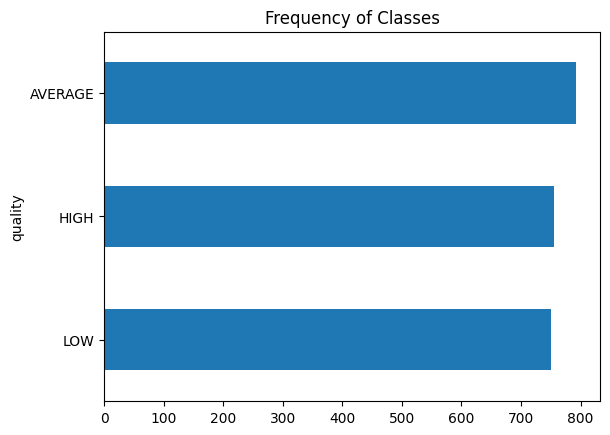

In [37]:
import matplotlib.pyplot as plt

py800_annotated_df_score["quality"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In [38]:
# how long are the submissions
py800_annotated_df_score['submission_length'] = py800_annotated_df_score['submission'].apply(lambda x: len(x.split()))
py800_annotated_df_score['submission_length'].describe()

count    2300.000000
mean       49.747826
std        48.592140
min         1.000000
25%        21.000000
50%        37.000000
75%        60.000000
max       556.000000
Name: submission_length, dtype: float64

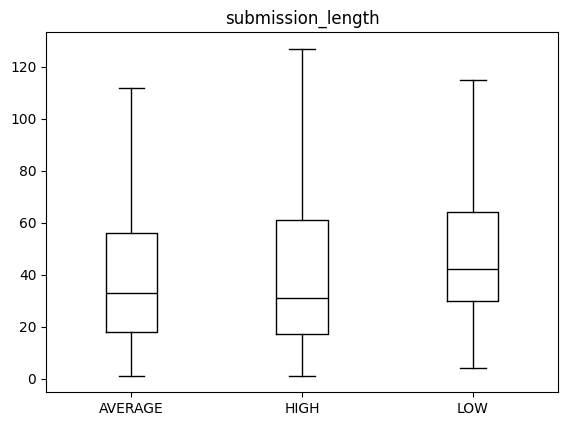

In [39]:
import matplotlib.pyplot as plt
py800_annotated_df_score.boxplot("submission_length", by="quality", grid=False, showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

In [17]:
# add a label to the dataframe based on the quality score: low, average, or high
py800_annotated_df_score['label'] = py800_annotated_df_score['quality'].apply(lambda x: 0 if x == 'LOW' else (1 if x == 'AVERAGE' else 2))
py800_annotated_df_score

,problem_id,problem,submission_id,submission,functionality,readability,pythonic,error_handling,efficiency,average,quality,submission_length,label
0,p03494,There are N positive integers written on a bla...,s642429606,"n=int(input())\na=list(map(int,input().split()...",4.0,3.0,3.0,1.0,4.0,3.0,LOW,14,0
1,p03494,There are N positive integers written on a bla...,s194658803,s = int(input())\ns = input().rstrip().split('...,3.0,4.0,3.0,2.0,3.0,3.0,LOW,64,0
2,p03494,There are N positive integers written on a bla...,s575045794,def lo2(n):\n count = 0\n while n%2==0:\...,4.0,3.0,4.0,1.0,4.0,3.2,LOW,21,0
3,p03494,There are N positive integers written on a bla...,s476321647,"a = int(input())\nb = list(map(int, input().sp...",3.0,3.0,2.0,1.0,2.0,2.2,LOW,49,0
4,p03494,There are N positive integers written on a bla...,s965275653,"N = int(input())\nA = list(map(int,input().spl...",4.0,3.0,3.0,1.0,4.0,3.0,LOW,32,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,p03962,AtCoDeer the deer recently bought three paint ...,s533634324,# A - AtCoDeerくんとペンキ\ndef main():\n abc = l...,5.0,4.0,5.0,4.0,5.0,4.6,HIGH,16,2
2296,p03962,AtCoDeer the deer recently bought three paint ...,s497805599,"ary = list(map(int, input().split()))\nprint(l...",5.0,5.0,5.0,4.0,4.0,4.6,HIGH,5,2
2297,p02844,AtCoder Inc. has decided to lock the door of i...,s123901226,from itertools import product\n\nn = int(input...,5.0,5.0,5.0,4.0,5.0,4.8,HIGH,52,2
2298,p03192,You are given an integer N that has exactly fo...,s139779800,input_num = str(input())\ncnt_2_in_str = lambd...,5.0,5.0,5.0,4.0,5.0,4.8,HIGH,15,2


get frequencies of values in cc_label column excluding NaN
cc_label
2.0    542
1.0     74
0.0     10
Name: count, dtype: int64
get frequencies of values in he_label column excluding NaN
he_label
0.0    1568
2.0     367
1.0     338
Name: count, dtype: int64
[0.         0.66666667 1.33333333 2.        ]


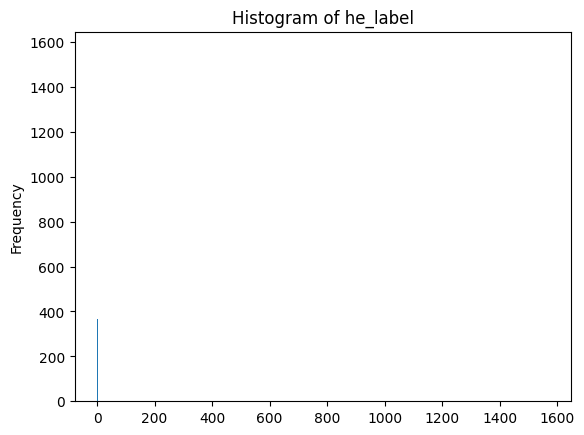

      label  cc_label  mi_label  he_label
141       1       NaN       1.0       0.0
740       0       NaN       2.0       2.0
271       0       NaN       1.0       0.0
894       2       NaN       2.0       2.0
982       2       2.0       1.0       0.0
1525      0       NaN       1.0       1.0
150       0       NaN       1.0       0.0
1600      2       NaN       1.0       0.0
225       0       NaN       1.0       0.0
268       0       NaN       1.0       0.0
1228      2       NaN       1.0       0.0
1716      2       NaN       2.0       2.0
981       2       NaN       2.0       2.0
646       0       NaN       2.0       0.0
1314      2       NaN       2.0       2.0
1964      0       NaN       1.0       0.0
1779      0       2.0       1.0       0.0
1117      2       2.0       1.0       1.0
1891      0       1.0       1.0       0.0
2296      2       NaN       2.0       2.0
Number of NaN values in column cc: 1674
Number of non-NaN values in column cc: 626
Number of NaN values in column cc: 

In [40]:
# get cyclomatic complexity for each submission
from radon.complexity import cc_rank, cc_visit
from radon.metrics import mi_visit, h_visit
import numpy as np
def get_cc(code):
    """
    https://radon.readthedocs.io/en/latest/api.html
    1 - 5	A (low risk - simple block)
    6 - 10	B (low risk - well structured and stable block)
    11 - 20	C (moderate risk - slightly complex block)
    """
    label = None
    try:
        cc = cc_visit(code)[0].complexity
        if cc <= 5:
            label = 2
        if cc > 5 and cc <=10:
            label = 1
        if cc > 10:
            label = 0
    except:
        return label
    return label

def get_mi(code):
    """
    https://radon.readthedocs.io/en/latest/api.html
    20-100 unmaintainable
    26-50 cause for concern
    51-75 needs improvement
    76-100 good
    """
    label = None
    try:
        mi = mi_visit(code, False)
        if mi <= 50:
            label = 0
        if mi > 50 and mi <=75:
            label = 1
        if mi > 75:
            label = 2
    except:
        return label
    return label

def get_he(code):
    """
    https://radon.readthedocs.io/en/latest/api.html
    """
    res = None
    try:
        res = h_visit(code).total.effort
        if res < 20:
            res = 2
        if res >= 20 and res < 80:
            res = 1
        if res >= 80:
            res = 0
    except:
        return res
    return res

py800_annotated_df_score['cc_label'] = py800_annotated_df_score['submission'].apply(get_cc)
py800_annotated_df_score['mi_label'] = py800_annotated_df_score['submission'].apply(get_mi)
py800_annotated_df_score['he_label'] = py800_annotated_df_score['submission'].apply(get_he)
print("get frequencies of values in cc_label column excluding NaN")
cc_frequencies = py800_annotated_df_score['cc_label'].value_counts()
print(cc_frequencies)
print("get frequencies of values in he_label column excluding NaN")
he_frequencies = py800_annotated_df_score['he_label'].value_counts()
print(he_frequencies)
# plot he_frequency distribution
he_frequencies.plot(kind='hist', bins=10, title='Histogram of he_label', color='blue', alpha=0.7)
# get range for each bin in the histogram
data = py800_annotated_df_score['he_label'].dropna()  # drop NaN values
# Calculate histogram and bin edges
hist, bin_edges = np.histogram(data, bins=3)
print(bin_edges)
plt.hist(data, bins=bin_edges)
# Set x-tick labels to bin ranges
# plt.xticks(bin_edges, [f'{round(bin_edges[i], 2)} - {round(bin_edges[i+1], 2)}' for i in range(len(bin_edges-1))], rotation=45)
plt.show()

print(py800_annotated_df_score[['label', 'cc_label', 'mi_label', 'he_label']].sample(20))
# count the number of NaN in column cc
nan_count = py800_annotated_df_score['cc_label'].isna().sum()
print(f'Number of NaN values in column cc: {nan_count}')
not_nan_count = py800_annotated_df_score['cc_label'].count()
print(f'Number of non-NaN values in column cc: {not_nan_count}')
nan_count = py800_annotated_df_score['cc_label'].isna().sum()
print(f'Number of NaN values in column cc: {nan_count}')
# filter all NaN rows
corr_df = py800_annotated_df_score[py800_annotated_df_score['cc_label'].notna()]
print(corr_df)
from scipy import stats
# calculate the correlation coefficient
x = corr_df['label']
y_cc = corr_df['cc_label']
y_mi = corr_df['mi_label']
y_he = corr_df['he_label']

corr = stats.spearmanr(x, y_cc)
print(f"Spearman correlation coefficient with cc is: {corr.statistic}")
corr = stats.spearmanr(x, y_mi)
print(f"Spearman correlation coefficient with mi is: {corr.statistic}")
corr = stats.spearmanr(x, y_he)
print(f"Spearman correlation coefficient with he is: {corr.statistic}")



In [45]:
# split the above dataframe into train, validation, and test sets
from sklearn.model_selection import train_test_split
print("==Distribution of labels before split==")
print(py800_annotated_df_score.groupby('quality').size())

# get all data with high label
high_quality = py800_annotated_df_score[py800_annotated_df_score['quality'] == 'HIGH']
# get all data with average label
average_quality = py800_annotated_df_score[py800_annotated_df_score['quality'] == 'AVERAGE']
# get all data with low label
low_quality = py800_annotated_df_score[py800_annotated_df_score['quality'] == 'LOW']

# split the high quality data into train, validation, and test sets
train_high, test_high = train_test_split(high_quality, test_size=200, random_state=42)
val_high, test_high = train_test_split(test_high, test_size=100, random_state=42)

# split the average quality data into train, validation, and test sets
train_average, test_average = train_test_split(average_quality, test_size=200, random_state=42)
val_average, test_average = train_test_split(test_average, test_size=100, random_state=42)

# split the low quality data into train, validation, and test sets
train_low, test_low = train_test_split(low_quality, test_size=200, random_state=42)
val_low, test_low = train_test_split(test_low, test_size=100, random_state=42)

# now, randomly drop rows from each of the splits to ensure that the distribution of labels is the same
# drop rows from train_high
train_high = train_high.drop(train_high.sample(n=6, random_state=42).index)
# drop rows from train_average
train_average = train_average.drop(train_average.sample(n=43, random_state=42).index)
# drop rows from train_low
train_low = train_low.drop(train_low.sample(n=1, random_state=42).index)

print("==Shapes of the high splits==")
print(f"Train high size: {train_high.shape}")
print(f"Validation high size: {val_high.shape}")
print(f"Test high size: {test_high.shape}")

print("==Shapes of the average splits==")
print(f"Train avg size: {train_average.shape}")
print(f"Validation avg size: {val_average.shape}")
print(f"Test avg size: {test_average.shape}")

print("==Shapes of the low splits==")
print(f"Train low size: {train_low.shape}")
print(f"Validation low size: {val_low.shape}")
print(f"Test low size: {test_low.shape}")

# merge the splits
train = pd.concat([train_high, train_average, train_low])
val = pd.concat([val_high, val_average, val_low])
test = pd.concat([test_high, test_average, test_low])

print("==Distribution of labels after split==")
print("       Train set")
print(train.groupby('quality').size())
print("       Validation set")
print(val.groupby('quality').size())
print("       Test set")
print(test.groupby('quality').size())

==Distribution of labels before split==
quality
AVERAGE    793
HIGH       756
LOW        751
dtype: int64
==Shapes of the high splits==
Train high size: (550, 16)
Validation high size: (100, 16)
Test high size: (100, 16)
==Shapes of the average splits==
Train avg size: (550, 16)
Validation avg size: (100, 16)
Test avg size: (100, 16)
==Shapes of the low splits==
Train low size: (550, 16)
Validation low size: (100, 16)
Test low size: (100, 16)
==Distribution of labels after split==
       Train set
quality
AVERAGE    550
HIGH       550
LOW        550
dtype: int64
       Validation set
quality
AVERAGE    100
HIGH       100
LOW        100
dtype: int64
       Test set
quality
AVERAGE    100
HIGH       100
LOW        100
dtype: int64


In [46]:
# save the dataframes to a json file
cols = ['problem_id', 'problem', 'submission_id', 'submission', 'label']
train[cols].to_json('../data/codeQualDatasetv1/train.jsonl', orient='records', lines=True)
val[cols].to_json('../data/codeQualDatasetv1/valid.jsonl', orient='records', lines=True)
test[cols].to_json('../data/codeQualDatasetv1/test.jsonl', orient='records', lines=True)


In [47]:
# load training set into huggingface dataset
from datasets import load_dataset, Features, Value, ClassLabel
data_files = {'train': '../data/codeQualDatasetv1/train.jsonl',
              'validation': '../data/codeQualDatasetv1/valid.jsonl', 
              'test': '../data/codeQualDatasetv1/test.jsonl'}
features = Features({'problem_id': Value(dtype='string', id=None),
                      'problem': Value(dtype='string', id=None),
                      'submission_id': Value(dtype='string', id=None),
                     'submission': Value(dtype='string', id=None), 
                     'label': ClassLabel(num_classes=3, names=['low', 'average', 'high'])
                     })
code_qual_dataset = load_dataset('json', data_files=data_files, features=features)
code_qual_dataset.save_to_disk('../data/hf_code_qual_dataset_v1.1')
print(code_qual_dataset)
print(code_qual_dataset['train'].features)
print(code_qual_dataset['train'][0])

/Users/dish/anaconda3/envs/codequal/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 1650 examples [00:00, 241480.92 examples/s]
Generating validation split: 300 examples [00:00, 171335.95 examples/s]
Generating test split: 300 examples [00:00, 117542.38 examples/s]
Saving the dataset (1/1 shards): 100%|██████████| 300/300 [00:00<00:00, 124177.56 examples/s]

DatasetDict({
    train: Dataset({
        features: ['problem_id', 'problem', 'submission_id', 'submission', 'label'],
        num_rows: 1650
    })
    validation: Dataset({
        features: ['problem_id', 'problem', 'submission_id', 'submission', 'label'],
        num_rows: 300
    })
    test: Dataset({
        features: ['problem_id', 'problem', 'submission_id', 'submission', 'label'],
        num_rows: 300
    })
})
{'problem_id': Value(dtype='string', id=None), 'problem': Value(dtype='string', id=None), 'submission_id': Value(dtype='string', id=None), 'submission': Value(dtype='string', id=None), 'label': ClassLabel(names=['low', 'average', 'high'], id=None)}
{'problem_id': 'p03059', 'problem': 'A biscuit making machine produces B biscuits at the following moments: A seconds, 2A seconds, 3A seconds and each subsequent multiple of A seconds after activation.\nFind the total number of biscuits produced within T + 0.5 seconds after activation.', 'submission_id': 's867969566', 'sub

In [48]:
# load the above DatasetDict
from datasets import Dataset, DatasetDict, load_dataset
code_qual_dataset = DatasetDict.load_from_disk('../data/hf_code_qual_dataset_v1')
print(code_qual_dataset)
print(code_qual_dataset['train'].features)

DatasetDict({
    train: Dataset({
        features: ['problem_id', 'problem', 'submission_id', 'submission', 'label'],
        num_rows: 1650
    })
    validation: Dataset({
        features: ['problem_id', 'problem', 'submission_id', 'submission', 'label'],
        num_rows: 300
    })
    test: Dataset({
        features: ['problem_id', 'problem', 'submission_id', 'submission', 'label'],
        num_rows: 300
    })
})
{'problem_id': Value(dtype='string', id=None), 'problem': Value(dtype='string', id=None), 'submission_id': Value(dtype='string', id=None), 'submission': Value(dtype='string', id=None), 'label': ClassLabel(names=['low', 'average', 'high'], id=None)}


In [49]:
# learn about tokenizer
from transformers import AutoTokenizer

def tokenize(batch):
    return tokenizer(batch["submission"], padding=True, truncation=True)

model_name = "microsoft/codebert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
tokenizer.add_special_tokens({"pad_token": "[PAD]"})

codequal_encoded: DatasetDict = code_qual_dataset.map(tokenize, batched=True, batch_size=None)
print(codequal_encoded["train"].column_names)
print(codequal_encoded["train"][0])
print(tokenizer.vocab_size)
print(tokenizer.model_max_length)
print(tokenizer.model_input_names)
tokens = tokenizer.convert_ids_to_tokens(codequal_encoded['train'][0]['input_ids'])
print(tokens)



Map: 100%|██████████| 300/300 [00:00<00:00, 4671.06 examples/s]

['problem_id', 'problem', 'submission_id', 'submission', 'label', 'input_ids', 'attention_mask']
{'problem_id': 'p03546', 'problem': 'Joisino the magical girl has decided to turn every single digit that exists on this world into 1.\nRewriting a digit i with j (0≤i,j≤9) costs c_{i,j} MP (Magic Points).\nShe is now standing before a wall. The wall is divided into HW squares in H rows and W columns, and at least one square contains a digit between 0 and 9 (inclusive).\nYou are given A_{i,j} that describes the square at the i-th row from the top and j-th column from the left, as follows:\n\nIf A_{i,j}≠-1, the square contains a digit A_{i,j}.\nIf A_{i,j}=-1, the square does not contain a digit.\n\nFind the minimum total amount of MP required to turn every digit on this wall into 1 in the end.', 'submission_id': 's033601798', 'submission': 'from types import CodeType\nimport unittest\n\n\ndef solve():\n    return 0\n\n\ndef main():\n    h, w = map(int, input().split())\n    c = [list(map(int